In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurements = base.classes.measurement
stations= base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

('2017-08-23',)


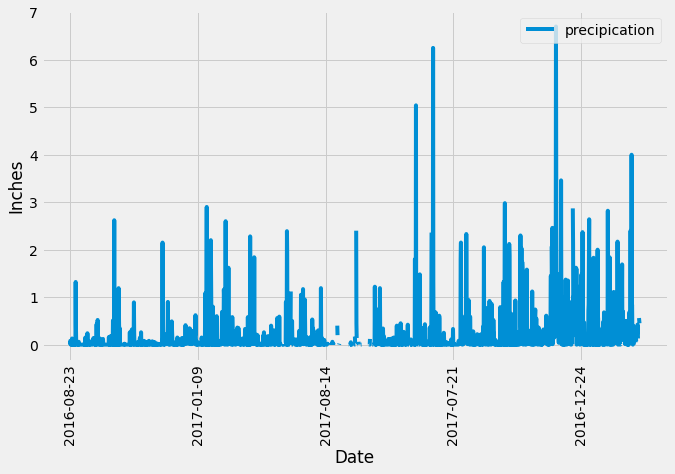

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
    #Find the latest date in the measurements
latestDate = session.query(measurements.date).order_by(measurements.date.desc()).first()
print(latestDate)
    
# Perform a query to retrieve the data and precipitation scores
precipitationScores = session.query(measurements.date, measurements.prcp).filter(measurements.date.between('2016-08-23','2017-08-23'))

# Save the query results as a Pandas DataFrame and set the index to the date column
rainDf = pd.DataFrame(precipitationScores, columns=['date','precipication'])
rainDf.set_index('date',inplace=True)

# Sort the dataframe by date
rainDf.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data
rainDf.plot(figsize=(10,6))
plt.xlabel('Date')
plt.ylabel('Inches')
plt.xticks(rotation=90)
plt.legend(loc='upper right')


In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
rainDf.describe()

,precipication
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [12]:
# Design a query to show how many stations are available in this dataset?
stationCount = session.query(func.count(stations.station))
print(stationCount.all())

[(9,)]


In [13]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
    #Query to pull station counts
stationsCount = session.query(measurements.station, func.count(measurements.station)).group_by(measurements.station)
    #Station counts into a DF
stationDF = pd.DataFrame(stationsCount,columns=['Station','Count'])
    #List in descending order
stationDF.sort_values('Count', ascending = False, inplace=True)
stationDF

,Station,Count
6,USC00519281,2772
7,USC00519397,2724
1,USC00513117,2709
8,USC00519523,2669
3,USC00516128,2612
2,USC00514830,2202
0,USC00511918,1979
4,USC00517948,1372
5,USC00518838,511


In [14]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
    #calculate lowest
mostActiveStation = stationDF.iloc[0,0]
lowest = session.query(func.min(measurements.tobs)).filter(measurements.station == mostActiveStation)
highest = session.query(func.max(measurements.tobs)).filter(measurements.station == mostActiveStation)
average = session.query(func.avg(measurements.tobs)).filter(measurements.station == mostActiveStation)
print(f'''
Station: {stationDF.loc[0,'Station']}
Lowest Temp:{lowest.all()}
Highest Temp: {highest.all()}
Average Temp: {average.all()}''')


Station: USC00511918
Lowest Temp:[(54.0,)]
Highest Temp: [(85.0,)]
Average Temp: [(71.66378066378067,)]


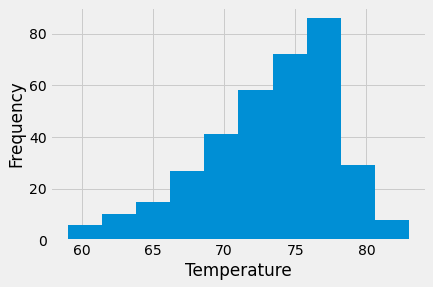

In [15]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
    #query last year for most active station
mostActiveTemps = session.query(measurements.tobs).filter(measurements.date.between('2016-08-23','2017-08-23')).filter(measurements.station == mostActiveStation)
    #convert query to DF
mostActiveTempsDF = pd.DataFrame(mostActiveTemps, columns=['temps'])

plt.hist(mostActiveTempsDF)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()